In [6]:
!pip install pandas
!pip install scikit-learn
!pip install scikit-learn-extra
!pip install matplotlib


     -------------------------------------- 346.2/346.2 kB 2.2 MB/s eta 0:00:00


In [8]:
from sklearn.cluster import KMeans 
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
data=pd.read_csv("credit_card.csv")
print(data.head)


<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  P

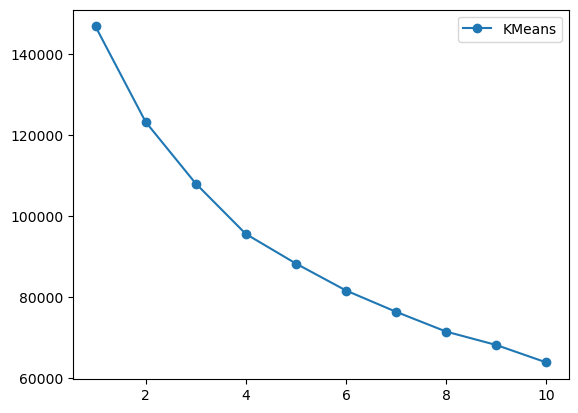

In [18]:
data=data.select_dtypes(exclude=['object','category'])
data=data.dropna()
scaler=StandardScaler()
data_s=scaler.fit_transform(data)



k_range = range(1, 11)
kmeans_inertias = []
kmedoids_inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k).fit(data_s)
    kmedoids = KMedoids(n_clusters=k).fit(data_s)
    kmeans_inertias.append(kmeans.inertia_)
    kmedoids_inertias.append(kmedoids.inertia_)

plt.plot(k_range, kmeans_inertias,"-o",label="KMeans")
plt.legend()
plt.show()
